# Exercise 3b: Masking

## Aim: Learn to mask data in xarray

Find the teaching material here: https://tutorial.xarray.dev/intermediate/indexing/boolean-masking-indexing.html

### Issues covered: 
- Create re-usable masks for data
- Plot masked data

Q1. For masking, we're back to using our ocean dataset. Load it now from `../data/xbhubo.pgc0apr.nc`.

In [1]:
import xarray as xr
ds = xr.open_dataset('../data/xbhubo.pgc0apr.nc')
temperature = ds["temp"]

Q2. Determine which grid cells sea surface temperaturevis more than the mean.

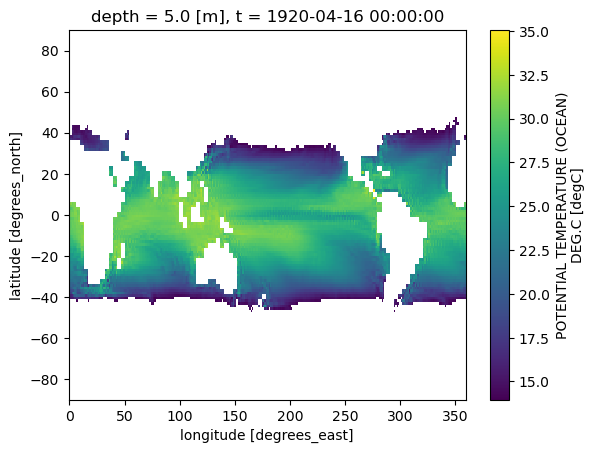

In [2]:
surface = ds.sel(depth=0, method="nearest")
surface.temp.where(surface.temp > surface.temp.mean()).plot()

Q3. Combine this with another .where() lookup to show only cells where the temperature is more than the mean and salinity is more than the mean.

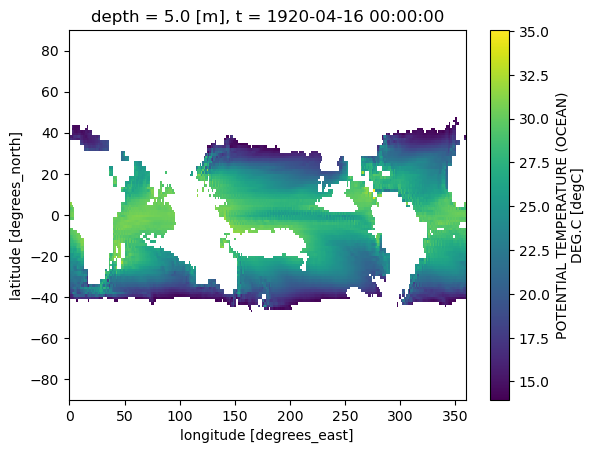

In [3]:
surface.temp.where(surface.temp > surface.temp.mean()).where(surface.salinity > surface.salinity.mean()).plot()

Q4. Masks are just boolean arrays. Create a re-usuable mask for the temperature and sst criteia above, and a combined one.

In [4]:
temp_mask = surface.temp > surface.temp.mean()
sal_mask = surface.salinity > surface.salinity.mean()
combined_mask = temp_mask & sal_mask

Q5. Use this mask to make the same temperature plot, and a similar one for sst.

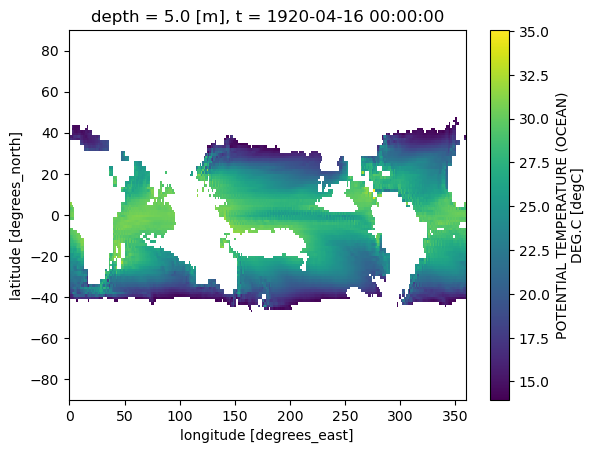

In [5]:
surface.temp.where(combined_mask).plot()

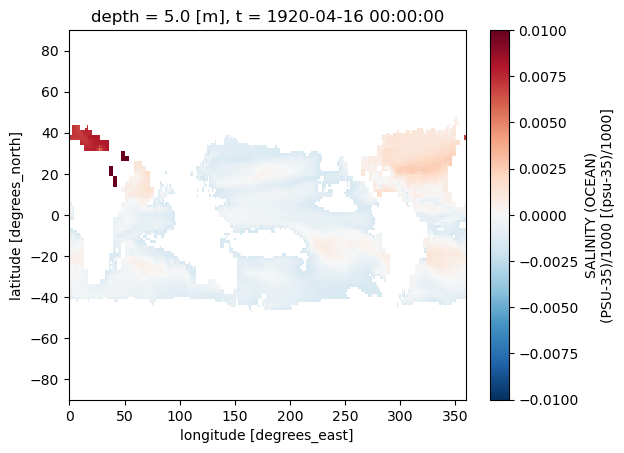

In [6]:
surface.salinity.where(combined_mask).plot()